# Exercise 05: One-dimensional lake

**Due:** _19 January 2020_

**Names:** Lukas, David, Linus, Mariana

Assume that governing equations in a lake are the one dimensional shallow water equations

\begin{align}
 \frac{\partial \eta}{\partial t} &= -H\frac{\partial u}{\partial x},
 \label{eq:1D_lake_cont} \\
 \frac{\partial u}{\partial t} &= -g\frac{\partial \eta}{\partial x} + \frac{F}{\rho_0H},
 \label{eq:1D_lake_momentum}
\end{align}
where $u$ is velocity, $\eta$ is the displacement of the lakes surface, $H$ is
the depth of the lake, $g$ is gravity, $\rho_0$ is the density of the water
and $F$ is the wind stress acting on the lakes surface.
Initialise the lake with $u=0$ and $\eta=0$ everywhere. The boundary condition is
$u=0$ at $x=0$ and $x=L$.

Consider the following grid arrangement in x for $u$ and $\eta$:
\begin{eqnarray*}
 u, \eta, u, \eta, u, \eta, u, \eta, u, \eta, u, \eta, u.
\end{eqnarray*}

Use this grid and write a program to solve the shallow water equations numerically.
Use forward-in-time, centred-in-space differencing for the continuity equation, and
backward-in-time, centred-in-space differencing for the momentum equation.

Take $\rho_0=1000\,kg\,m^{-3}$, $H=10\,m$, $L=100\,km$, $g=9.8\,m\,s^{-2}$, $dx=5\,km$, $dt=300\,s$. Assume
that wind stress is constant in time and homogeneous in space and take $F=0.01N m^{-2}$. Integrate the equations
for two days and plot the results. (10 points)

## 5

We have for the forward-in-time, centred-in-space differencing for the continuity equation:

$$\frac{\eta^{n+1}_{j} - \eta^{n}_{j}}{\Delta t} = -H \frac{u^{n}_{j+1} - u^{n}_{j-1}}{2\Delta x}$$

For the backward-in-time, centred-in-space differencing for the momentum equation:

$$\frac{u^{n+1}_{j} - u^{n}_{j}}{\Delta t} = -g \frac{\eta^{n+1}_{j+1} - \eta^{n+1}_{j-1}}{2\Delta x} + \frac{F}{\rho_{0}H}$$

Considering $u$ and $\eta$ in the same grid point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# constants
rho = 1000            #kg.m-3
h = 10                #m
L = 100 * 1e3         #m
g = 9.8               #m.s-2
dx = 5 * 1e3          #m
dt = 300              #s
F = 0.01              #N.m-2
t_max = 2 * 24 * 3600 #s
q_eta = (-h * dt / (2*dx))

# x & time domain 
x = np.arange(0, L + dx/2, dx)
t = np.arange(0, t_max + dt / 2, dt)
mesht, meshx = np.meshgrid(t,x)

jmax = len(x)
n = int((t_max - 0) / dt)

In [11]:
q_eta

-0.3

In [12]:
# initial conditions
eta_0 = u_1 = eta_1 = u_0 = np.zeros(len(x))
eta_out = u_out = [eta_0]

# SHOULDNT IT BE u and then eta?

for i in range(0, int(n/2)):    # For some reason it is giving the double values for n in the output
    u_0[0] = u_0[-1] = 0 #boundaty conditions
    eta_1[1:jmax-1] = q_eta * (u_0[2:jmax] - u_0[0:jmax-2]) + eta_0[1:jmax-1]
    u_1[1:jmax-1] = (-g * dt / (2*dx)) * (eta_1[2:jmax] - eta_1[0:jmax-2]) + (dt * F / rho * h) + u_0[1:jmax-1]
    eta_out.append(eta_1)
    u_out.append(u_1)
    u_0 = np.copy(u_1)
    eta_0 = np.copy(eta_1)
    
eta_out = np.array(eta_out)
u_out = np.array(u_out)

/opt/tljh/user/envs/ws20climnum/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


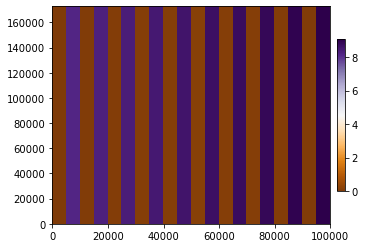

In [13]:
cmap = plt.get_cmap(name='PuOr')
map1 = plt.pcolormesh(meshx, mesht, u_out.T, cmap= cmap)
plt.colorbar(map1, pad=0.02, shrink=0.7)
cmap = plt.get_cmap(name='RdBu')
#plt.title()

# I didnt like the aspect of the plot, can we make it smoother somehow?

In [14]:
np.shape(u_out)

(577, 21)

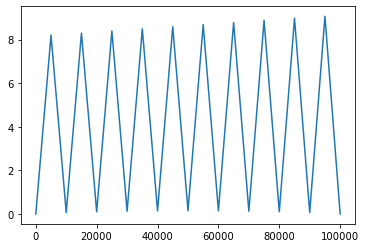

In [15]:
plt.plot(x,u_out[1,:])

/opt/tljh/user/envs/ws20climnum/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


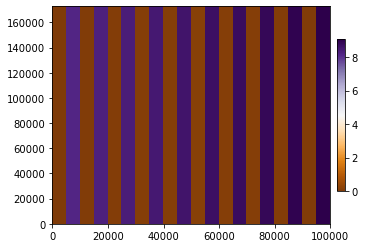

In [16]:
cmap = plt.get_cmap(name='PuOr')
map1 = plt.pcolormesh(meshx, mesht, eta_out.T, cmap= cmap)
plt.colorbar(map1, pad=0.02, shrink=0.7)
cmap = plt.get_cmap(name='RdBu')

In [52]:

#def forw_centred(const, var_0):
 #   return (const * (var_0[2:jmax] - var_0[1:jmax-1]))
#for n in range(0, len(t)):    
#    eta_1[1:jmax-1] = forw_centred(q_eta, u_0)


#def A_harmonic(x):
        #harmonic matrix:
#        A = np.zeros((len(x), self.N-2))
#        indices = np.arange(self.N -2)

        # set diagonal
#        A[indices, indices] = -2 / self.dx ** 2

        # set off-diagonal
#        A[indices[:-1], indices[:-1] + 1] = 1 / self.dx ** 2
#        A[indices[:-1] + 1, indices[:-1]] = 1 / self.dx ** 2
#        return A